# Convex optimisation and Lagrangian Dual 
## ECMM422 - Machine Learning

This notebook will elaborate on the example seen in class.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Let us consider the following optimisition problem: 

<br/>

<b>
Find $\min_x f_0(x)$

such that $f_1(x) \le 0$
</b>

where
$$
\left.
\begin{array}{rcl}
f_0(x) & = &  \frac{x^2}{2}\\
f_1(x) & = &  -2x-5
\end{array}
\right.
$$

This is the <b>primal problem</b>.

We plot the functions $f_0$ and $f_1$ below. 


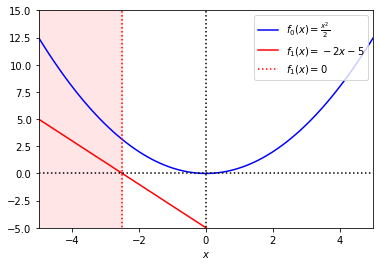

In [73]:
x = np.linspace(-5, +5, 100)

def f0(x): 
    return x**2/2

def f1(x): 
    return -2*x-5

f1zero=-5.0/2.0

plt.plot(x, f0(x), 'b', label=r'$f_0(x)=\frac{x^2}{2}$')
plt.plot(x, f1(x), 'r', label=r'$f_1(x)=-2x-5$')
plt.plot(f1zero*np.ones(100), np.linspace(-15,+15,100), 'r:', label=r'$f_1(x)=0$')
plt.plot(x, np.zeros(100), 'k:')
plt.plot(np.zeros(100), np.linspace(-15,+15,100), 'k:')

plt.axvspan(-5, f1zero, alpha=0.1, color='red')
plt.xlim(-5,+5)
plt.ylim(-5,+15)
plt.xlabel(r'$x$')
plt.legend()
plt.show()

In order to find the $x^*$ that minimises the function $f_0(x)$ such that the constraint $f_1(x^*)=0$ is satisfied, we will solve the Lagrangian dual problem. 

We first form the Lagrangian as: 
$$ L(x,\lambda) = f_0(x) + \lambda f_1(x) = \frac{x^2}{2} + \lambda(-2x-5)$$
where $\lambda$ is the Lagrangian multiplier for the constraint $f_1$. 

In [13]:
# We define the Lagrangian for this problem
def L(x,lb): 
    return f0(x) + lb*f1(x) 

As in the lecture, we calculate the Lagrangian dual by minimising the Lagrangian over $x$: 
$$g(\lambda) = \min_x L(x,\lambda) = \min_x \frac{x^2}{2} + \lambda(-2x-5)$$

We now that the derivative of a function is zero at optima (minima or maxima), so in order to minimise this function, we 
1. calculate its derivative with respect to $x$: 
$$\frac{\partial L(x,\lambda)}{\partial x} = x - 2\lambda$$
2. set the derivative to zero to find the value of $x$
$$x^* - 2\lambda = 0$$
$$x^* = 2\lambda$$
3. we plug this value back to get the Lagrangian dual: 

$$g(\lambda) = \frac{(2\lambda)^2}{2} - \lambda(2(2\lambda)+5) = 2\lambda^2 - 4\lambda^2 - 5\lambda = -2\lambda^2-5 \lambda$$

So the Lagrangian dual is: 
$$g(\lambda) = -2\lambda^2 - 5 \lambda$$


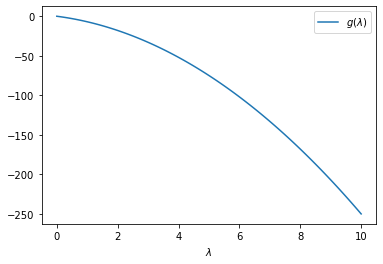

In [20]:
def g(lb): 
    return -2*lb**2 - 5*lb

lb = np.linspace(0, 10, 100)
plt.plot(lb, g(lb), label=r'$g(\lambda)$')
plt.xlabel(r'$\lambda$')
plt.legend()
plt.show()

The <b>Lagrangian dual problem</b> is to find the maximum of the Lagrangian dual function over $\lambda$

$$ \max_\lambda g(\lambda) = \max_\lambda -2\lambda^2 - 5\lambda $$

As before, we will find the maximum by calculating the derivative with respect to $\lambda$: 

$$ \frac{\partial g(\lambda)}{\partial\lambda} = -4\lambda - 5 $$

and setting it to zero. In this case, because we have $\lambda \ge 0$, the solution is trivially 
$$ \lambda^* = 0 $$

From this we can find the solution: 

$$ x^* = 2\lambda^* = 0$$ 

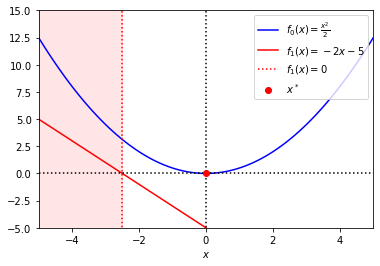

In [74]:
xsol = 0

plt.plot(x, f0(x), 'b', label=r'$f_0(x)=\frac{x^2}{2}$')
plt.plot(x, f1(x), 'r', label=r'$f_1(x)=-2x-5$')
plt.plot(f1zero*np.ones(100), np.linspace(-15,+15,100), 'r:', label=r'$f_1(x)=0$')
plt.plot(x, np.zeros(100), 'k:')
plt.plot(np.zeros(100), np.linspace(-15,+15,100), 'k:')
plt.axvspan(-5, f1zero, alpha=0.1, color='red')

plt.plot( xsol, f0(xsol), 'ro', label=r'$x^*$' )

plt.xlim(-5,+5)
plt.ylim(-5,+15)
plt.xlabel(r'$x$')
plt.legend()
plt.show()


## Example 2

Let us now consider the case where we have a second constraint: 
    
<br/>

<b>
Find $\min_x \frac{x^2}{2}$

such that 
$$
\begin{array}{rcl}
-2x-5 & \le &  0\\
x+1  & \le &  0
\end{array}
$$
</b>


so we will set 

$$
\begin{array}{rcl}
f_0(x) & = & \frac{x^2}{2}\\
f_1(x) & = & -2x-5 \\
f_2(x) & = & x+1  \\
\end{array}
$$




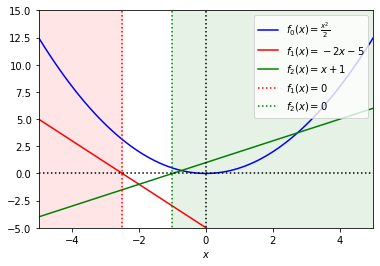

In [75]:
x = np.linspace(-5, +5, 100)

def f0(x): 
    return x**2/2

def f1(x): 
    return -2*x-5

def f2(x): 
    return x+1

f1zero=-5.0/2.0
f2zero=-1

plt.plot(x, f0(x), 'b', label=r'$f_0(x)=\frac{x^2}{2}$')
plt.plot(x, f1(x), 'r', label=r'$f_1(x)=-2x-5$')
plt.plot(x, f2(x), 'g', label=r'$f_2(x)=x+1$')

plt.plot(x, np.zeros(100), 'k:')
plt.plot(np.zeros(100), np.linspace(-15,+15,100), 'k:')

plt.plot(f1zero*np.ones(100), np.linspace(-15,+15,100), 'r:', label=r'$f_1(x)=0$')
plt.plot(f2zero*np.ones(100), np.linspace(-15,+15,100), 'g:', label=r'$f_2(x)=0$')

plt.axvspan(-5, f1zero, alpha=0.1, color='red')
plt.axvspan(f2zero, +5, alpha=0.1, color='green')
plt.xlim(-5,+5)
plt.ylim(-5,+15)
plt.xlabel(r'$x$')
plt.legend()
plt.show()

The Lagrangian becomes: 

$$ L(x,\lambda_1, \lambda_2) = f_0(x) + \lambda_1 f_1(x) + \lambda_2 f_2(x)= \frac{x^2}{2} + \lambda_1(-2x-5) + \lambda_2(x+1)$$

We calculate the Lagrangian dual as before: 

$$ 
g(\lambda_1, \lambda_2) = \min_x L(x, \lambda_1, \lambda_2) 
$$

we calculate the derivative: 

$$\frac{\partial L(x,\lambda_1, \lambda_2)}{\partial x} = x - 2\lambda_1 + \lambda_2$$

and set it to zero to find the minimum:

$$ x = 2\lambda_1 - \lambda_2$$ 

We can then replace in the Lagrangian: 

$$ 
g(\lambda_1, \lambda_2) = \frac{(2\lambda_1 - \lambda_2)^2}{2} + \lambda_1( -2 (2\lambda_1 - \lambda_2) - 5) + \lambda_2( 2\lambda_1 - \lambda_2 + 1 )
$$

$$ 
g(\lambda_1, \lambda_2) = 
(2\lambda_1^2 + \frac{1}{2}\lambda_2^2 - 2\lambda_1\lambda_2)
+ 
(-4 \lambda_1^2 + 2 \lambda_1\lambda_2 - 5\lambda_1)
+ 
(2\lambda_1\lambda_2 - \lambda_2^2 + \lambda_2)
$$

$$ g(\lambda_1, \lambda_2) = -2\lambda_1^2 - \frac{1}{2}\lambda_2^2 + 2\lambda_1\lambda_2 - 5\lambda_1 + \lambda_2$$




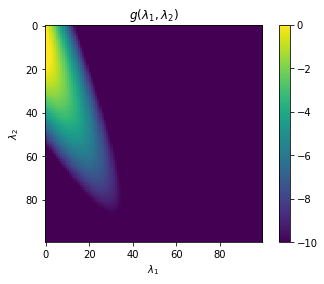

In [65]:
# The following code plots the Lagrangian to give an intuition

def g(lb): 
    return (-2*lb[0]**2 -0.5*lb[1]**2 + 2*lb[0]*lb[1] - 5*lb[0] + lb[1])

L1, L2 = np.meshgrid(np.linspace(0,10, 100), np.linspace(0,10,100))
G = g([L1,L2])
plt.imshow(G)
plt.colorbar()
plt.clim([-10,0]) # let's set the range to the interesting area: we only want to maximize
plt.xlabel(r'$\lambda_1$')
plt.ylabel(r'$\lambda_2$')
plt.title(r'$g(\lambda_1, \lambda_2)$')
plt.show()


As before, we then solve the Lagrangian dual problem: 

$$ \max_{\lambda_1,\lambda_2} g(\lambda_1, \lambda_2)$$

Clearly, because we must have $\lambda_1 \ge 0$, we need to set $$\lambda_1^*=0$$

If we we set the derivatives with respect to $\lambda_2$ to zero: 

$$ \frac{ \partial g(\lambda_1, \lambda_2)}{\partial \lambda_2} = 
-\lambda_2 + 2\lambda_1 + 1
$$ 
and set it to zero
$$
\frac{ \partial g(\lambda_1, \lambda_2)}{\partial \lambda_2}=0
\implies 
\lambda^*_2 = 2\lambda^*_1+1 = 1
$$

we then can replace in $x$ to find the solution: 

$$ x^* = 2\lambda_1^* - \lambda_2^*$$ 

$$ x^* = -1$$ 



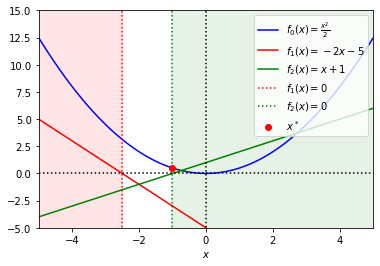

In [76]:
xsol = -1

x = np.linspace(-5, +5, 100)

def f0(x): 
    return x**2/2

def f1(x): 
    return -2*x-5

def f2(x): 
    return x+1

f1zero=-5.0/2.0
f2zero=-1

plt.plot(x, f0(x), 'b', label=r'$f_0(x)=\frac{x^2}{2}$')
plt.plot(x, f1(x), 'r', label=r'$f_1(x)=-2x-5$')
plt.plot(x, f2(x), 'g', label=r'$f_2(x)=x+1$')
plt.plot(x, np.zeros(100), 'k:')
plt.plot(np.zeros(100), np.linspace(-15,+15,100), 'k:')

plt.plot(f1zero*np.ones(100), np.linspace(-15,+15,100), 'r:', label=r'$f_1(x)=0$')
plt.plot(f2zero*np.ones(100), np.linspace(-15,+15,100), 'g:', label=r'$f_2(x)=0$')

plt.plot( xsol, f0(xsol), 'ro', label=r'$x^*$' )

plt.axvspan(-5, f1zero, alpha=0.1, color='red')
plt.axvspan(f2zero, +5, alpha=0.1, color='green')
plt.xlim(-5,+5)
plt.ylim(-5,+15)
plt.xlabel(r'$x$')
plt.legend()
plt.show()

You can see here that the first constraint $f_1(x) \le 0$ is inactive in this problem (ie, removing it would not change the solution to this problem), and its Lagrangian is zero. Conversely, the second constraint $f_2(x) \le 0$ is active (ie, including it changed the solution) hence its Lagrangian is non-zero. 